## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0724 14:22:46.192311  2544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 14:22:46.207271  2544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 14:22:46.209267  2544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0724 14:22:46.266645  2544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0724 14:22:46.272657  2544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=600, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0724 14:23:15.420057  2544 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0724 14:23:15.459982  2544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/600
50000/50000 [==============================] - 6s 128us/step - loss: 1.9378 - acc: 0.2941 - val_loss: 1.7705 - val_acc: 0.3659
Epoch 2/600
50000/50000 [==============================] - 6s 124us/step - loss: 1.7192 - acc: 0.3820 - val_loss: 1.6688 - val_acc: 0.3979
Epoch 3/600
50000/50000 [==============================] - 6s 126us/step - loss: 1.6221 - acc: 0.4170 - val_loss: 1.6015 - val_acc: 0.4223
Epoch 4/600
50000/50000 [==============================] - 6s 118us/step - loss: 1.5557 - acc: 0.4432 - val_loss: 1.5251 - val_acc: 0.4607
Epoch 5/600
50000/50000 [==============================] - 6s 119us/step - loss: 1.5117 - acc: 0.4593 - val_loss: 1.5218 - val_acc: 0.4538
Epoch 6/600
50000/50000 [==============================] - 6s 120us/step - loss: 1.4659 - acc: 0.4767 - val_loss: 1.4964 - val_acc: 0.4743
Epoch 7/600
50000/50000 [==============================] - 6s 118us/step - loss: 1.4304 - acc: 0.4894 - val_loss: 1.

50000/50000 [==============================] - 6s 121us/step - loss: 0.5484 - acc: 0.8036 - val_loss: 2.0090 - val_acc: 0.5094
Epoch 60/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.5432 - acc: 0.8040 - val_loss: 1.9995 - val_acc: 0.5129
Epoch 61/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.5506 - acc: 0.8009 - val_loss: 2.0280 - val_acc: 0.5157
Epoch 62/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.5329 - acc: 0.8101 - val_loss: 2.0897 - val_acc: 0.5141
Epoch 63/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.5082 - acc: 0.8204 - val_loss: 2.1007 - val_acc: 0.5135
Epoch 64/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.5071 - acc: 0.8186 - val_loss: 2.0924 - val_acc: 0.5144
Epoch 65/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.5087 - acc: 0.8157 - val_loss: 2.0502 - val_acc: 0.5119
Epoch 66/600
50000/50000 [=======

50000/50000 [==============================] - 6s 123us/step - loss: 0.2463 - acc: 0.9102 - val_loss: 3.3277 - val_acc: 0.4980
Epoch 118/600
50000/50000 [==============================] - 6s 123us/step - loss: 0.2425 - acc: 0.9127 - val_loss: 3.3710 - val_acc: 0.5002
Epoch 119/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.2567 - acc: 0.9073 - val_loss: 3.3361 - val_acc: 0.4950
Epoch 120/600
50000/50000 [==============================] - 6s 123us/step - loss: 0.2895 - acc: 0.8971 - val_loss: 3.3124 - val_acc: 0.5047
Epoch 121/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.2371 - acc: 0.9143 - val_loss: 3.3875 - val_acc: 0.5021
Epoch 122/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.2151 - acc: 0.9240 - val_loss: 3.3673 - val_acc: 0.5086
Epoch 123/600
50000/50000 [==============================] - 6s 123us/step - loss: 0.2357 - acc: 0.9147 - val_loss: 3.4571 - val_acc: 0.5067
Epoch 124/600
50000/50000 [

50000/50000 [==============================] - 6s 122us/step - loss: 0.1760 - acc: 0.9363 - val_loss: 4.0836 - val_acc: 0.4918
Epoch 176/600
50000/50000 [==============================] - 6s 124us/step - loss: 0.1910 - acc: 0.9328 - val_loss: 4.0113 - val_acc: 0.4999
Epoch 177/600
50000/50000 [==============================] - 6s 123us/step - loss: 0.1436 - acc: 0.9492 - val_loss: 4.1038 - val_acc: 0.4956
Epoch 178/600
50000/50000 [==============================] - 7s 131us/step - loss: 0.1755 - acc: 0.9389 - val_loss: 4.2336 - val_acc: 0.4943
Epoch 179/600
50000/50000 [==============================] - 7s 131us/step - loss: 0.2352 - acc: 0.9203 - val_loss: 4.0924 - val_acc: 0.4946
Epoch 180/600
50000/50000 [==============================] - 6s 128us/step - loss: 0.1467 - acc: 0.9488 - val_loss: 4.1820 - val_acc: 0.5049
Epoch 181/600
50000/50000 [==============================] - 7s 137us/step - loss: 0.1351 - acc: 0.9527 - val_loss: 4.1537 - val_acc: 0.5069
Epoch 182/600
50000/50000 [

50000/50000 [==============================] - 6s 121us/step - loss: 0.1243 - acc: 0.9569 - val_loss: 4.5636 - val_acc: 0.4906
Epoch 234/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.1630 - acc: 0.9438 - val_loss: 4.5375 - val_acc: 0.5015
Epoch 235/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.0908 - acc: 0.9682 - val_loss: 4.4819 - val_acc: 0.5041
Epoch 236/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.1118 - acc: 0.9611 - val_loss: 4.7335 - val_acc: 0.4909
Epoch 237/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.1548 - acc: 0.9471 - val_loss: 4.5948 - val_acc: 0.4908
Epoch 238/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.1654 - acc: 0.9433 - val_loss: 4.5830 - val_acc: 0.4933
Epoch 239/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.1604 - acc: 0.9451 - val_loss: 4.6366 - val_acc: 0.4892
Epoch 240/600
50000/50000 [

50000/50000 [==============================] - 6s 122us/step - loss: 0.0859 - acc: 0.9711 - val_loss: 4.7889 - val_acc: 0.4987
Epoch 292/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.0731 - acc: 0.9739 - val_loss: 4.8363 - val_acc: 0.4978
Epoch 293/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.0648 - acc: 0.9779 - val_loss: 4.9341 - val_acc: 0.4931
Epoch 294/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.1589 - acc: 0.9482 - val_loss: 4.8210 - val_acc: 0.4845
Epoch 295/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.2111 - acc: 0.9340 - val_loss: 4.7206 - val_acc: 0.4918
Epoch 296/600
50000/50000 [==============================] - 6s 123us/step - loss: 0.1228 - acc: 0.9589 - val_loss: 4.7586 - val_acc: 0.4989
Epoch 297/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.0905 - acc: 0.9687 - val_loss: 4.8367 - val_acc: 0.4923
Epoch 298/600
50000/50000 [

50000/50000 [==============================] - 6s 121us/step - loss: 0.0887 - acc: 0.9705 - val_loss: 5.1557 - val_acc: 0.4945
Epoch 350/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.1298 - acc: 0.9573 - val_loss: 5.0050 - val_acc: 0.4967
Epoch 351/600
50000/50000 [==============================] - 6s 119us/step - loss: 0.0678 - acc: 0.9773 - val_loss: 5.1141 - val_acc: 0.4906
Epoch 352/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.0727 - acc: 0.9750 - val_loss: 5.0869 - val_acc: 0.4877
Epoch 353/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.1238 - acc: 0.9598 - val_loss: 4.9796 - val_acc: 0.4866
Epoch 354/600
50000/50000 [==============================] - 6s 119us/step - loss: 0.2523 - acc: 0.9260 - val_loss: 4.9817 - val_acc: 0.4870
Epoch 355/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.1246 - acc: 0.9582 - val_loss: 5.0534 - val_acc: 0.4924
Epoch 356/600
50000/50000 [

50000/50000 [==============================] - 6s 122us/step - loss: 0.0320 - acc: 0.9893 - val_loss: 5.1194 - val_acc: 0.4940
Epoch 408/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.1083 - acc: 0.9641 - val_loss: 5.1829 - val_acc: 0.4881
Epoch 409/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.2047 - acc: 0.9397 - val_loss: 5.0241 - val_acc: 0.4948
Epoch 410/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.0855 - acc: 0.9720 - val_loss: 5.0975 - val_acc: 0.4970
Epoch 411/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.0670 - acc: 0.9774 - val_loss: 5.0508 - val_acc: 0.5042
Epoch 412/600
50000/50000 [==============================] - 6s 123us/step - loss: 0.0511 - acc: 0.9830 - val_loss: 5.1357 - val_acc: 0.4962
Epoch 413/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.0749 - acc: 0.9751 - val_loss: 5.1758 - val_acc: 0.4930
Epoch 414/600
50000/50000 [

50000/50000 [==============================] - 7s 131us/step - loss: 0.2265 - acc: 0.9367 - val_loss: 5.3329 - val_acc: 0.4818
Epoch 466/600
50000/50000 [==============================] - 6s 124us/step - loss: 0.1102 - acc: 0.9650 - val_loss: 5.1889 - val_acc: 0.4926
Epoch 467/600
50000/50000 [==============================] - 6s 123us/step - loss: 0.0651 - acc: 0.9780 - val_loss: 5.2482 - val_acc: 0.4941
Epoch 468/600
50000/50000 [==============================] - 6s 125us/step - loss: 0.0652 - acc: 0.9784 - val_loss: 5.2782 - val_acc: 0.4957
Epoch 469/600
50000/50000 [==============================] - 6s 126us/step - loss: 0.0418 - acc: 0.9860 - val_loss: 5.2885 - val_acc: 0.4890
Epoch 470/600
50000/50000 [==============================] - 6s 124us/step - loss: 0.0461 - acc: 0.9838 - val_loss: 5.3357 - val_acc: 0.4926
Epoch 471/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.1001 - acc: 0.9675 - val_loss: 5.3293 - val_acc: 0.4892
Epoch 472/600
50000/50000 [

50000/50000 [==============================] - 8s 150us/step - loss: 0.0992 - acc: 0.9685 - val_loss: 5.2848 - val_acc: 0.4993
Epoch 524/600
50000/50000 [==============================] - 6s 128us/step - loss: 0.0338 - acc: 0.9894 - val_loss: 5.2956 - val_acc: 0.4953
Epoch 525/600
50000/50000 [==============================] - 6s 123us/step - loss: 0.0207 - acc: 0.9934 - val_loss: 5.2820 - val_acc: 0.4996
Epoch 526/600
50000/50000 [==============================] - 6s 122us/step - loss: 0.0063 - acc: 0.9990 - val_loss: 5.2780 - val_acc: 0.5021
Epoch 527/600
50000/50000 [==============================] - 7s 137us/step - loss: 0.0043 - acc: 0.9994 - val_loss: 5.3269 - val_acc: 0.4975
Epoch 528/600
50000/50000 [==============================] - 7s 132us/step - loss: 0.0052 - acc: 0.9992 - val_loss: 5.3561 - val_acc: 0.5026
Epoch 529/600
50000/50000 [==============================] - 7s 130us/step - loss: 0.0038 - acc: 0.9994 - val_loss: 5.3792 - val_acc: 0.4973
Epoch 530/600
50000/50000 [

50000/50000 [==============================] - 6s 121us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.9844 - val_acc: 0.5038
Epoch 582/600
50000/50000 [==============================] - 6s 120us/step - loss: 0.0032 - acc: 0.9999 - val_loss: 5.0044 - val_acc: 0.5023
Epoch 583/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.0276 - val_acc: 0.5061
Epoch 584/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.0025 - acc: 0.9999 - val_loss: 5.0756 - val_acc: 0.5021
Epoch 585/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 5.0935 - val_acc: 0.5036
Epoch 586/600
50000/50000 [==============================] - 6s 121us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 5.1392 - val_acc: 0.5053
Epoch 587/600
50000/50000 [==============================] - 6s 119us/step - loss: 0.3905 - acc: 0.9267 - val_loss: 4.8519 - val_acc: 0.4471
Epoch 588/600
50000/50000 [

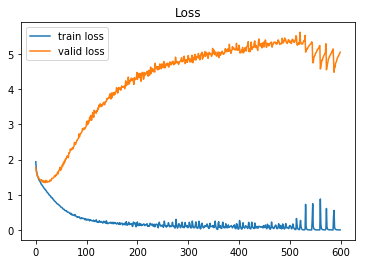

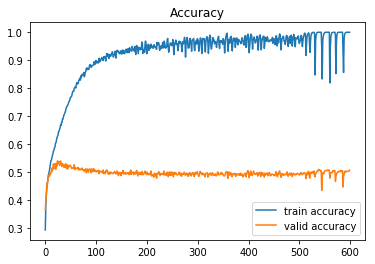

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()